In [1]:
import pyhf
import numpy as np
import matplotlib.pyplot as plt
import pyhf.contrib.viz.brazil
from pyhf.infer.calculators import AsymptoticCalculator
import scipy.stats
plt.rcParams['savefig.facecolor']='white'


def gpdf(qq,muprime,sig,mu):
    cut = mu**2/sig**2
    
    # 1/√(2π)
    standard_pre = 1/np.sqrt(2*np.pi)

    # compute the arg of the exponential
    muprime_muhat1_minus_over_sig = (qq - (mu**2/sig**2 - (2*mu*muprime/sig**2))  )/(2*mu/sig)
    muprime_muhat2_minus_over_sig = (np.sqrt(qq)-(mu-muprime)/sig) 

    # chose which one
    muhat_over_sig = np.where(qq>cut,muprime_muhat1_minus_over_sig,muprime_muhat2_minus_over_sig)

    # exp(-0.5 (mu^-mu'))
    arg   = -0.5*(muhat_over_sig)**2

    # compute the jacobian 
    # 1/ sigma * dµ^/dq
    oos_j1 =  1/(2*mu/sig)
    oos_j2 =  1/(2*np.sqrt(qq))
    
    # chose which one
    one_over_sig_jacobian = np.where(qq>cut,oos_j1,oos_j2)

    # compute the reparametrized gaussian
    return standard_pre * np.exp(arg)*one_over_sig_jacobian

def testrail_parab(muhat,mu,sigma):
    return (muhat-mu)**2/sigma**2

def testrail_flat(muhat,mu,sigma):
    return np.where(
        muhat<0,
        (muhat-mu)**2/sigma**2 - muhat**2/sigma**2,
        np.where(muhat < mu,
            (muhat-mu)**2/sigma**2,
            0.0
        )
    )

def get_toy_results(test_poi,toys):
    qmu_tilde = np.asarray(
        [
            pyhf.infer.test_statistics.qmu_tilde(
                test_poi,
                toy,
                model,
                init_pars=model.config.suggested_init(),
                par_bounds=model.config.suggested_bounds(),
                fixed_params=model.config.suggested_fixed(),
            )
            for toy in toys
        ]
    )

    unbounded_bounds = model.config.suggested_bounds()
    unbounded_bounds[model.config.poi_index] = (-10, 10)
    pars = np.asarray(
        [pyhf.infer.mle.fit(toy, model, par_bounds=unbounded_bounds) for toy in toys]
    )

    muhat = pars[:, model.config.poi_index]
    return muhat,qmu_tilde    

model = pyhf.simplemodels.hepdata_like(
    signal_data=[30.0], bkg_data=[50.0], bkg_uncerts=[7.0]
)
data = [55.0] + model.config.auxdata

asimov_data = pyhf.infer.calculators.generate_asimov_data(0.0,data,model,
        model.config.suggested_init(),model.config.suggested_bounds(),model.config.suggested_fixed()
)

In [2]:
muhatmin, muhatmax = -2,3
mumin, mumax = 1e-2,1.2
maxsigma = 4

qqspan = np.linspace(0,maxsigma**2,10001)
muspan = np.linspace(mumin, mumax,31)
muhatspan = np.linspace(muhatmin, muhatmax,1001)
test_stats = []
vals = []

for mu_test in muspan:
    calc = AsymptoticCalculator(data,model)
    ts = calc.teststatistic(mu_test)
    ds,db = calc.distributions(mu_test)
    cl_sb,cl_b,cl_s = calc.pvalues(ts,ds,db)
    test_stats.append([ds.shift,db.shift,ts])
    vals.append([cl_sb,cl_b,cl_s])

vals = np.array(vals)
test_stats = np.array(test_stats)


def getv(mu_test):
    calc = AsymptoticCalculator(data,model)
    ts = calc.teststatistic(mu_test)
    ds,db = calc.distributions(mu_test)
    cl_sb,cl_b,cl_s = calc.pvalues(ts,ds,db)
    return [cl_sb,cl_b,cl_s]



/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/pyhf/tensor/numpy_backend.py:334: RuntimeWarning: invalid value encountered in log
  return n * np.log(lam) - lam - gammaln(n + 1.0)
/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


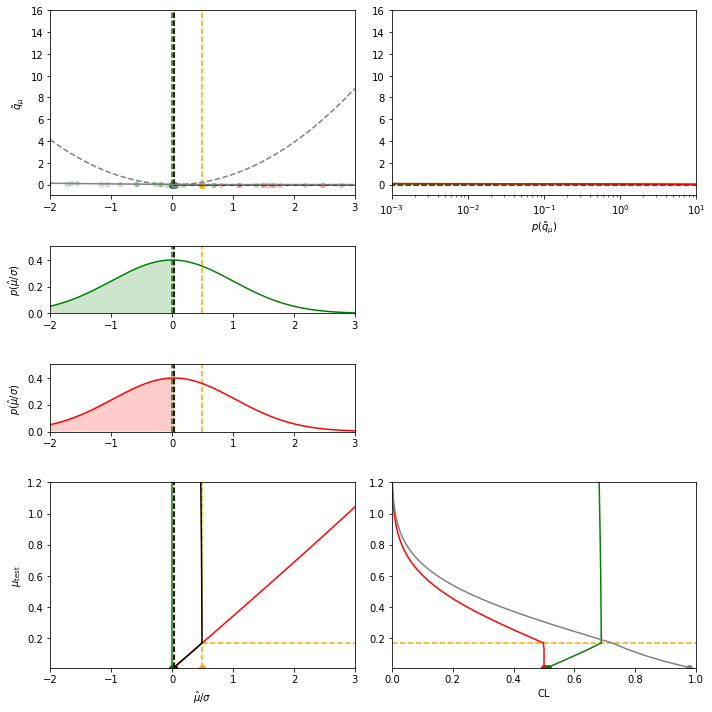

/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/pyhf/tensor/numpy_backend.py:334: RuntimeWarning: invalid value encountered in log
  return n * np.log(lam) - lam - gammaln(n + 1.0)
/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


<Figure size 432x288 with 0 Axes>

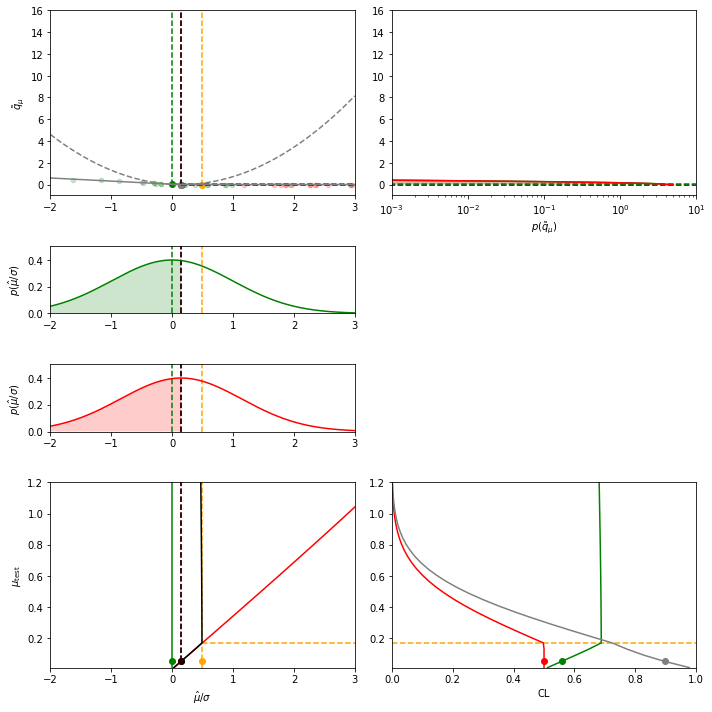

/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/pyhf/tensor/numpy_backend.py:334: RuntimeWarning: invalid value encountered in log
  return n * np.log(lam) - lam - gammaln(n + 1.0)
/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


<Figure size 432x288 with 0 Axes>

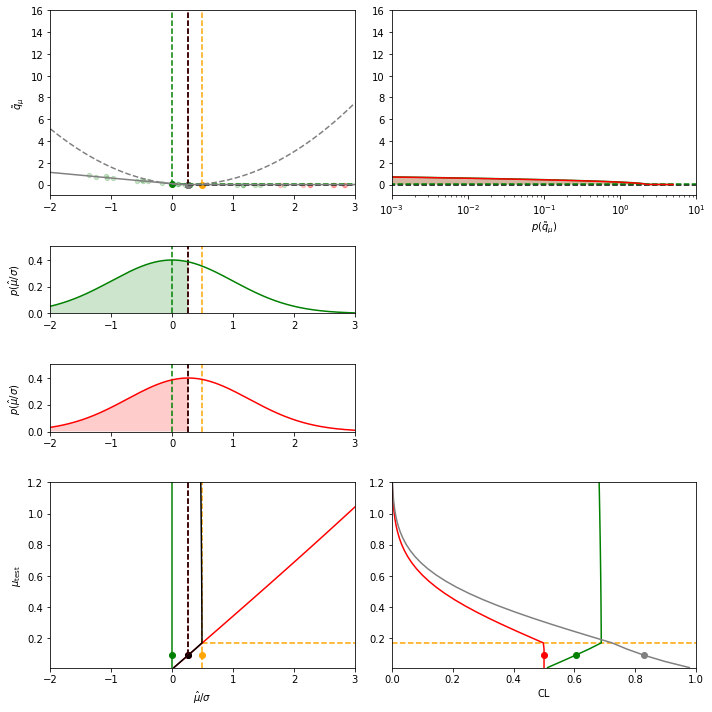

/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/pyhf/tensor/numpy_backend.py:334: RuntimeWarning: invalid value encountered in log
  return n * np.log(lam) - lam - gammaln(n + 1.0)
/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


<Figure size 432x288 with 0 Axes>

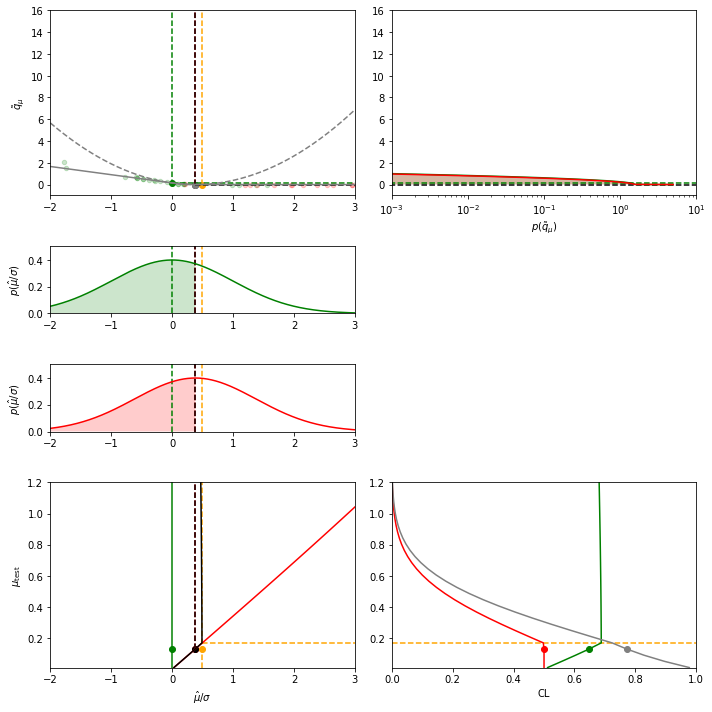

/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/pyhf/tensor/numpy_backend.py:334: RuntimeWarning: invalid value encountered in log
  return n * np.log(lam) - lam - gammaln(n + 1.0)
/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


<Figure size 432x288 with 0 Axes>

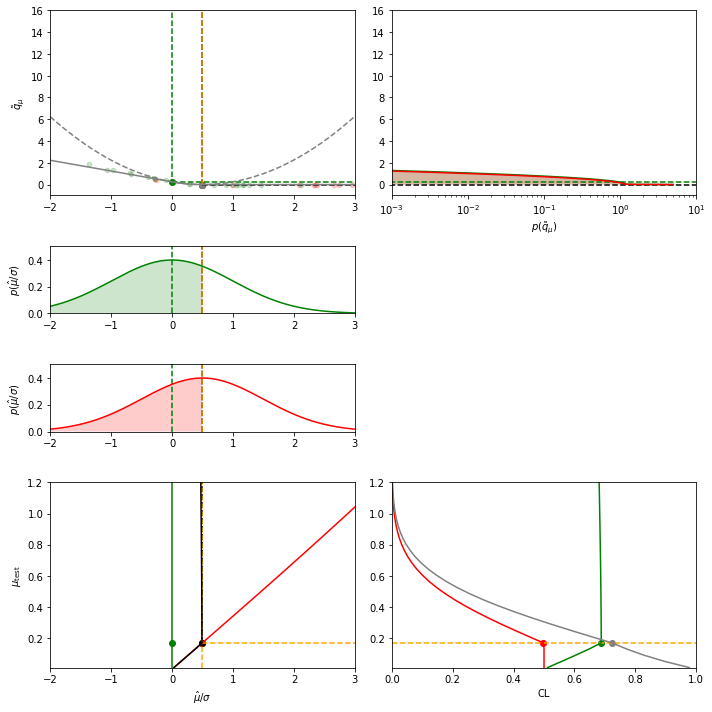

/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/pyhf/tensor/numpy_backend.py:334: RuntimeWarning: invalid value encountered in log
  return n * np.log(lam) - lam - gammaln(n + 1.0)
/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


<Figure size 432x288 with 0 Axes>

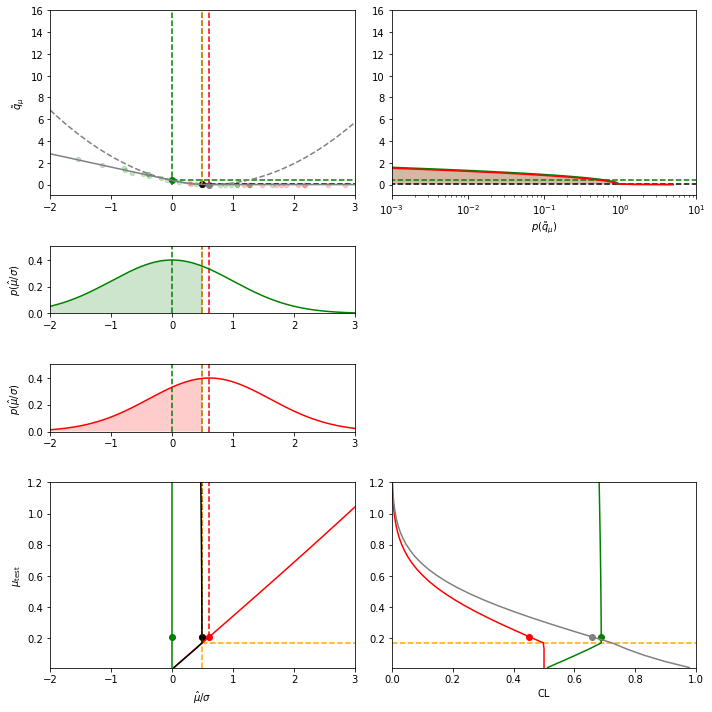

/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/pyhf/tensor/numpy_backend.py:334: RuntimeWarning: invalid value encountered in log
  return n * np.log(lam) - lam - gammaln(n + 1.0)
/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


<Figure size 432x288 with 0 Axes>

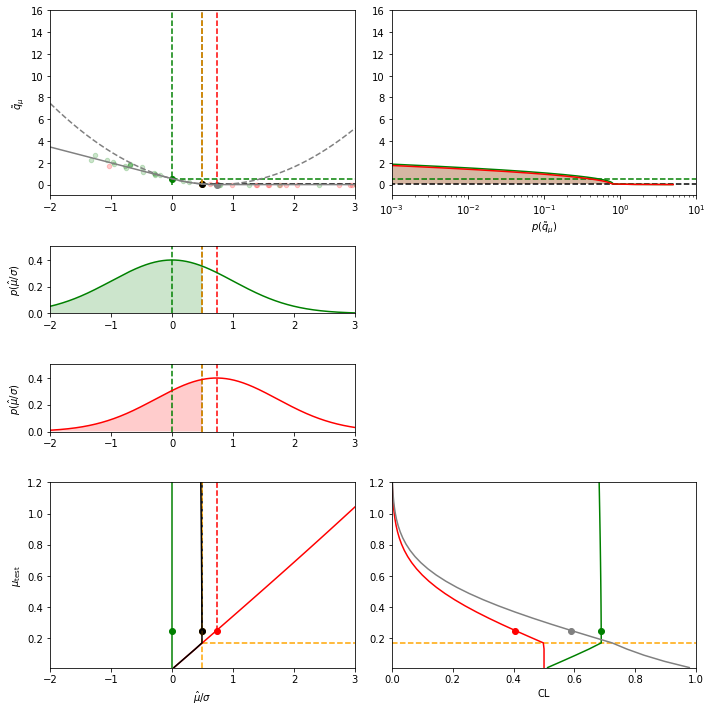

/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/pyhf/tensor/numpy_backend.py:334: RuntimeWarning: invalid value encountered in log
  return n * np.log(lam) - lam - gammaln(n + 1.0)
/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


<Figure size 432x288 with 0 Axes>

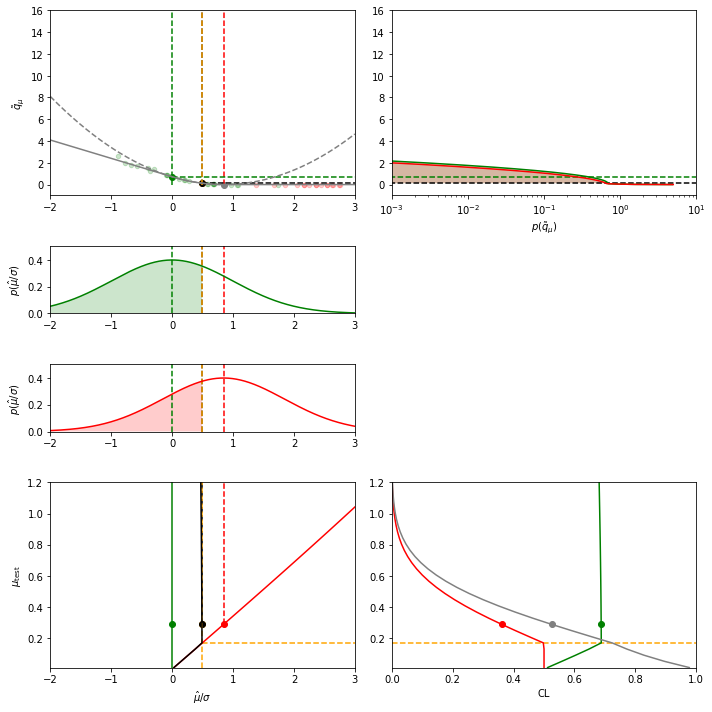

/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/pyhf/tensor/numpy_backend.py:334: RuntimeWarning: invalid value encountered in log
  return n * np.log(lam) - lam - gammaln(n + 1.0)
/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


<Figure size 432x288 with 0 Axes>

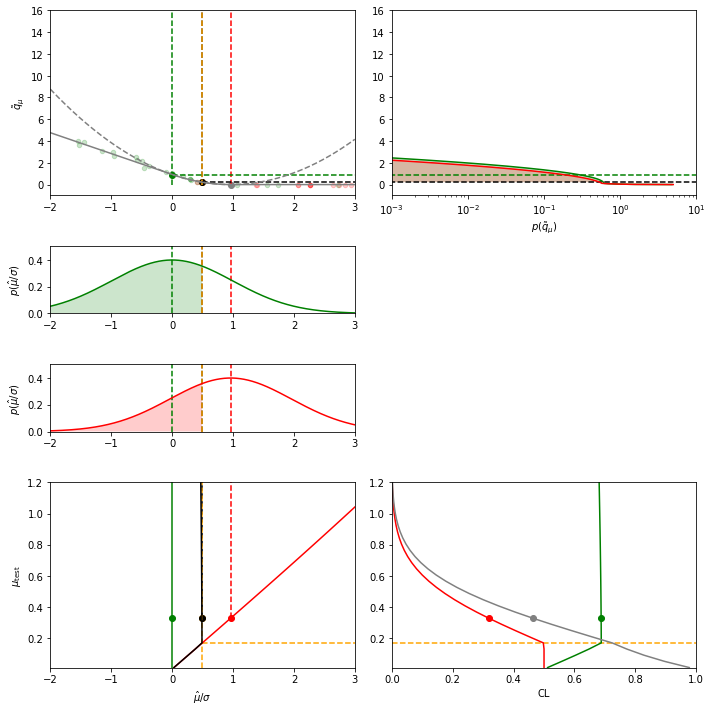

/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/pyhf/tensor/numpy_backend.py:334: RuntimeWarning: invalid value encountered in log
  return n * np.log(lam) - lam - gammaln(n + 1.0)
/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


<Figure size 432x288 with 0 Axes>

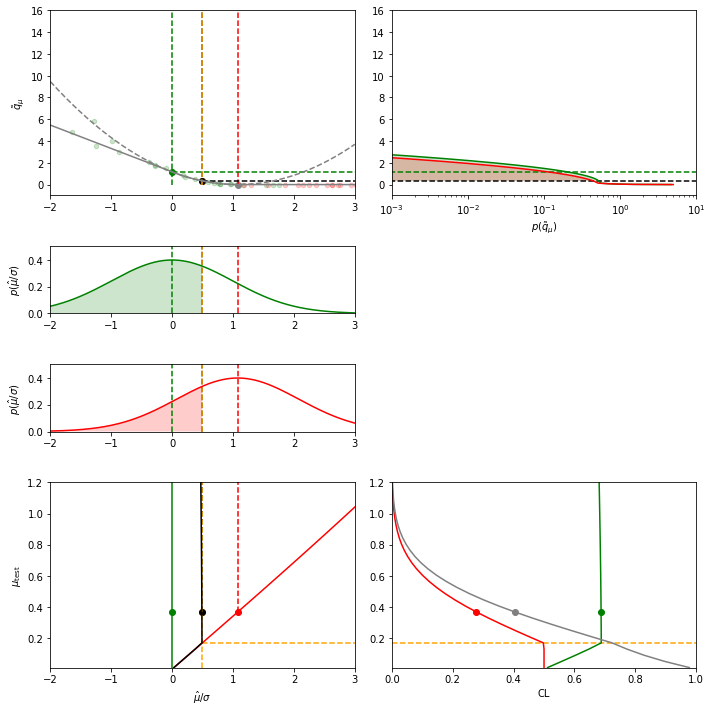

/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/pyhf/tensor/numpy_backend.py:334: RuntimeWarning: invalid value encountered in log
  return n * np.log(lam) - lam - gammaln(n + 1.0)
/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


<Figure size 432x288 with 0 Axes>

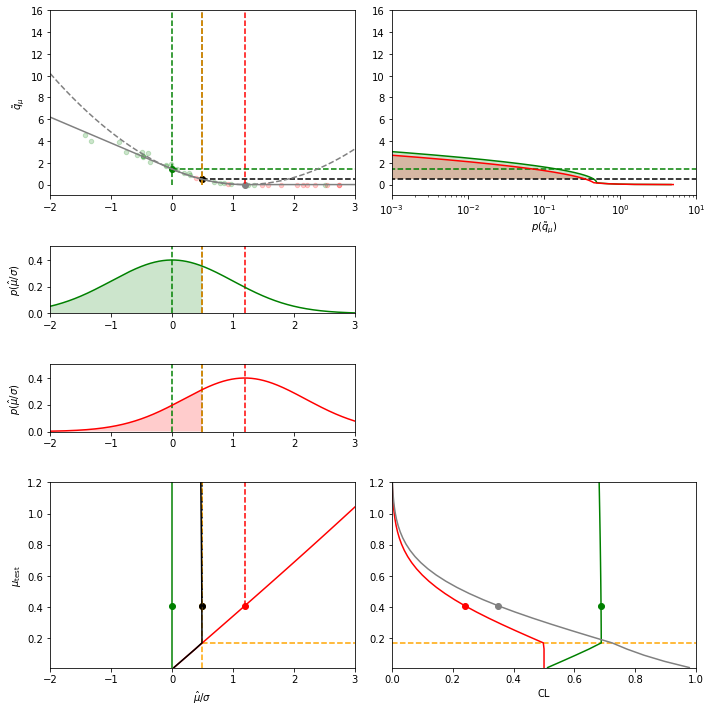

/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/pyhf/tensor/numpy_backend.py:334: RuntimeWarning: invalid value encountered in log
  return n * np.log(lam) - lam - gammaln(n + 1.0)
/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


<Figure size 432x288 with 0 Axes>

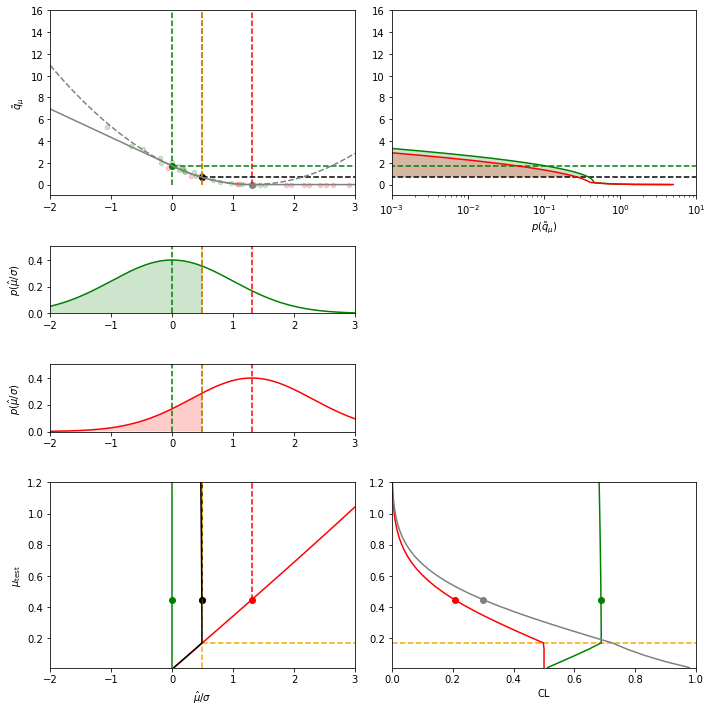

/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/pyhf/tensor/numpy_backend.py:334: RuntimeWarning: invalid value encountered in log
  return n * np.log(lam) - lam - gammaln(n + 1.0)
/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


<Figure size 432x288 with 0 Axes>

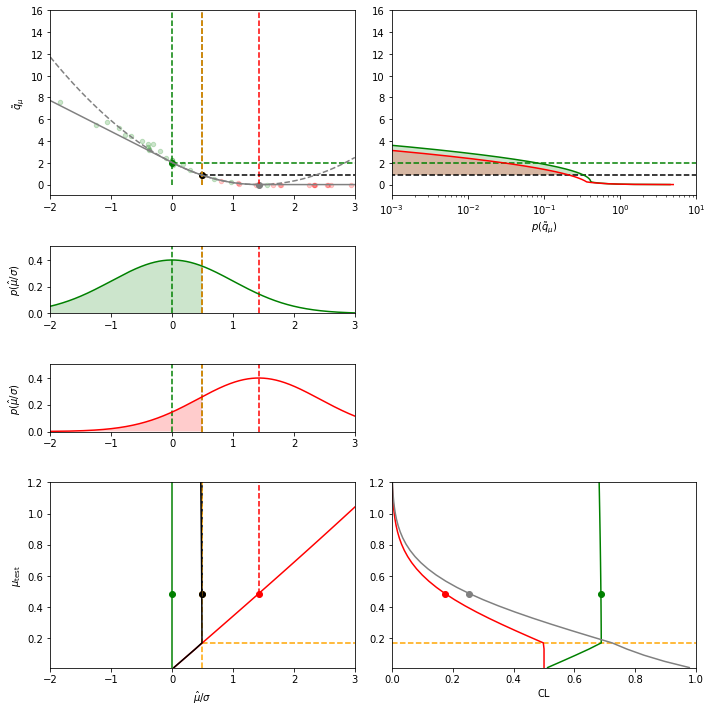

/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/pyhf/tensor/numpy_backend.py:334: RuntimeWarning: invalid value encountered in log
  return n * np.log(lam) - lam - gammaln(n + 1.0)
/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


<Figure size 432x288 with 0 Axes>

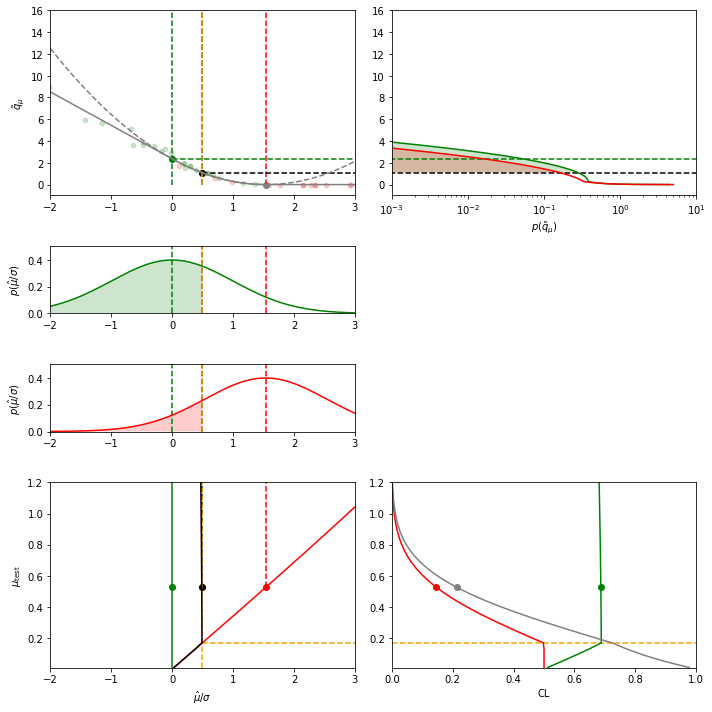

/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/pyhf/tensor/numpy_backend.py:334: RuntimeWarning: invalid value encountered in log
  return n * np.log(lam) - lam - gammaln(n + 1.0)
/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


<Figure size 432x288 with 0 Axes>

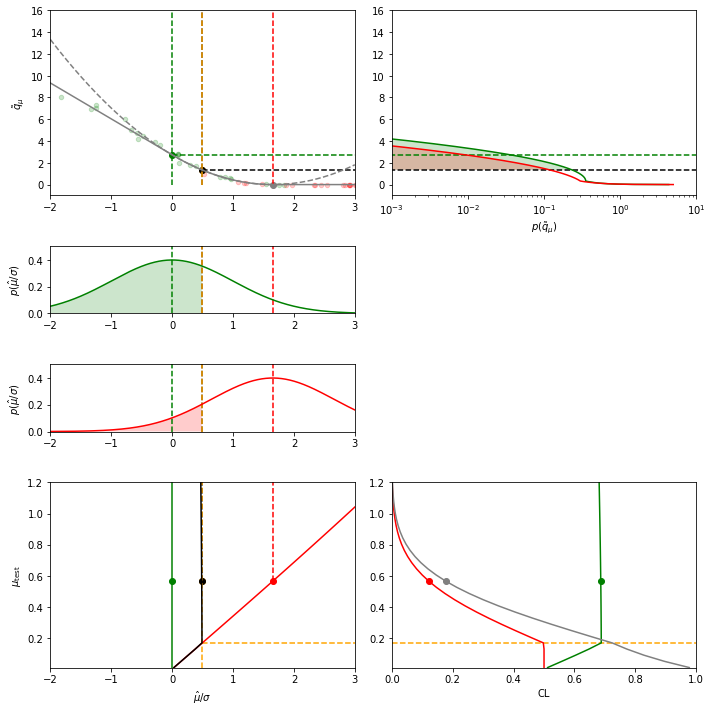

/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/pyhf/tensor/numpy_backend.py:334: RuntimeWarning: invalid value encountered in log
  return n * np.log(lam) - lam - gammaln(n + 1.0)
/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


<Figure size 432x288 with 0 Axes>

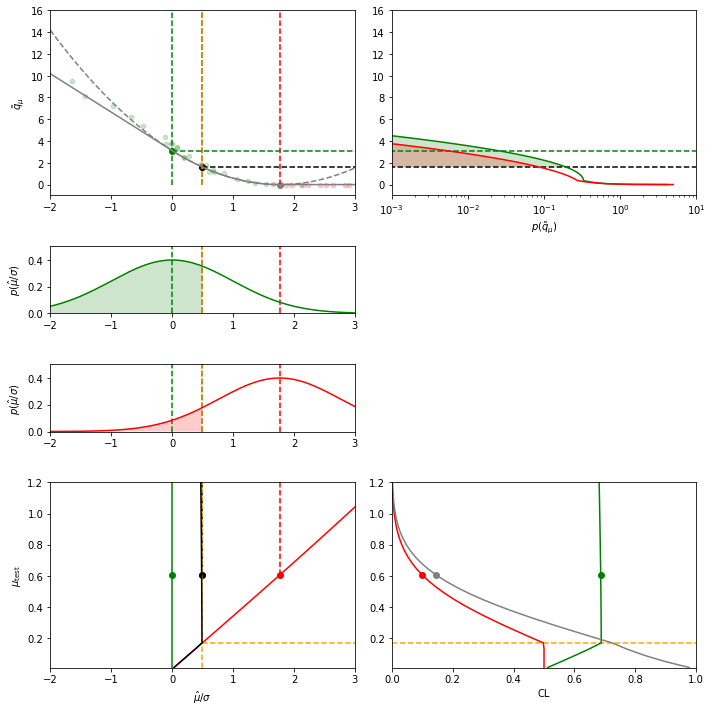

/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/pyhf/tensor/numpy_backend.py:334: RuntimeWarning: invalid value encountered in log
  return n * np.log(lam) - lam - gammaln(n + 1.0)
/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


<Figure size 432x288 with 0 Axes>

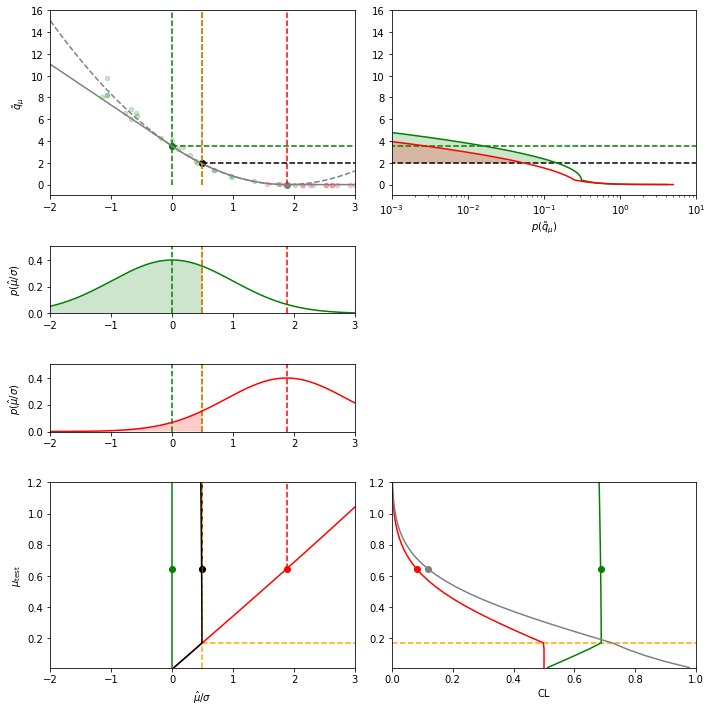

/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/pyhf/tensor/numpy_backend.py:334: RuntimeWarning: invalid value encountered in log
  return n * np.log(lam) - lam - gammaln(n + 1.0)
/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


<Figure size 432x288 with 0 Axes>

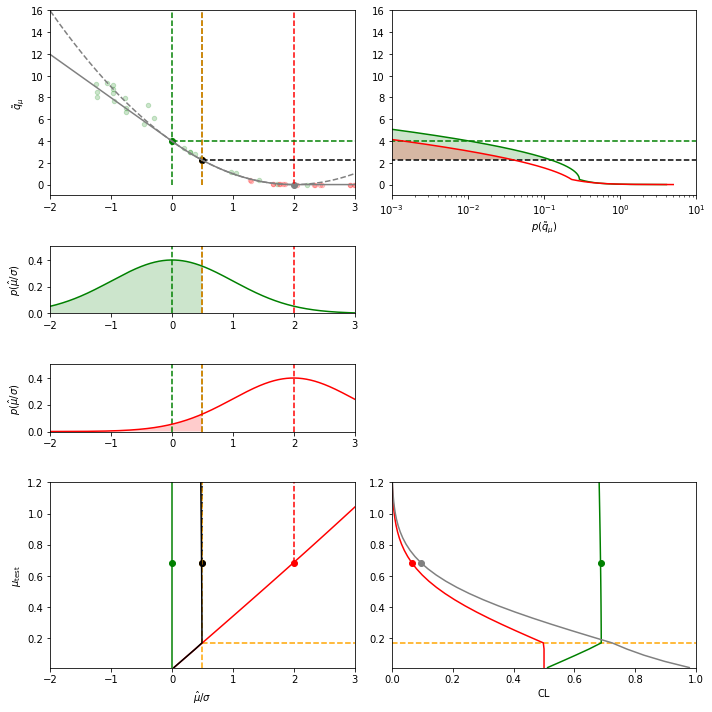

/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/pyhf/tensor/numpy_backend.py:334: RuntimeWarning: invalid value encountered in log
  return n * np.log(lam) - lam - gammaln(n + 1.0)
/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


<Figure size 432x288 with 0 Axes>

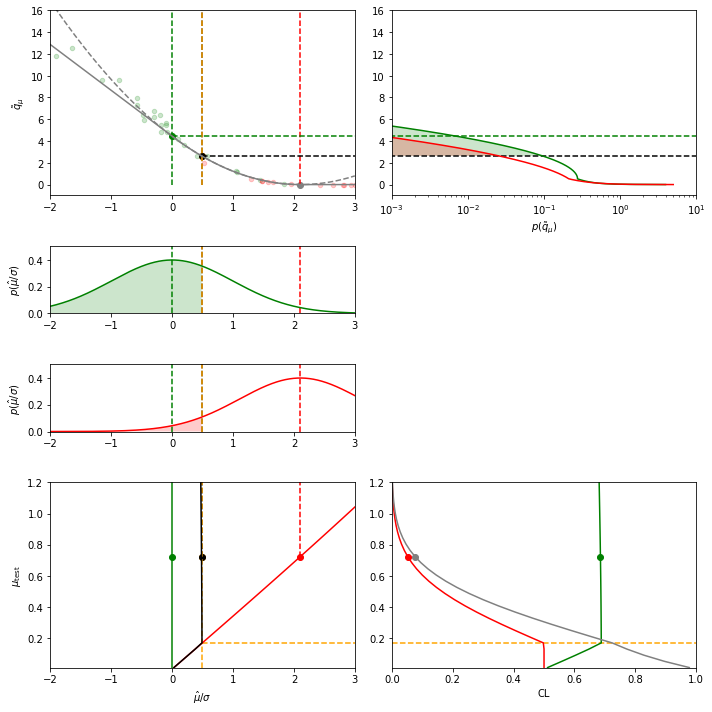

/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/pyhf/tensor/numpy_backend.py:334: RuntimeWarning: invalid value encountered in log
  return n * np.log(lam) - lam - gammaln(n + 1.0)
/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


<Figure size 432x288 with 0 Axes>

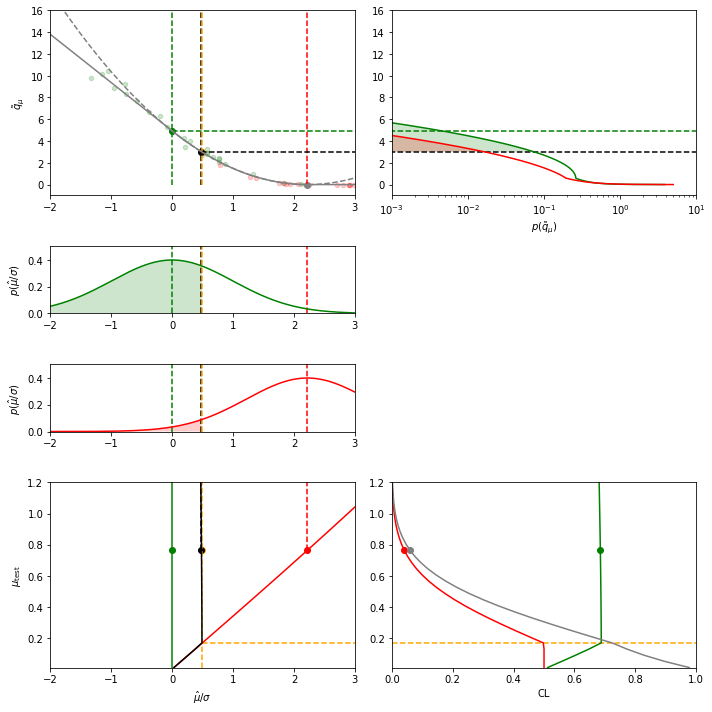

/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/pyhf/tensor/numpy_backend.py:334: RuntimeWarning: invalid value encountered in log
  return n * np.log(lam) - lam - gammaln(n + 1.0)
/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


<Figure size 432x288 with 0 Axes>

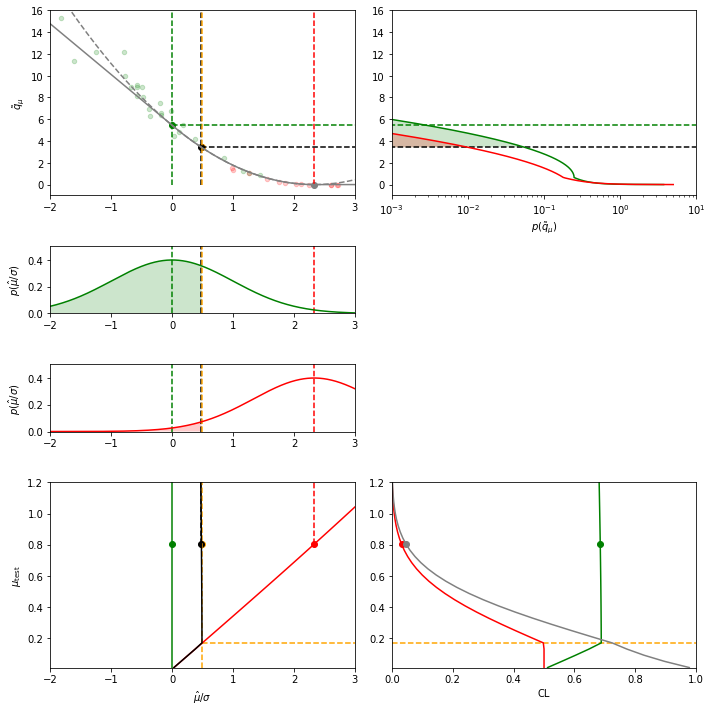

/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/pyhf/tensor/numpy_backend.py:334: RuntimeWarning: invalid value encountered in log
  return n * np.log(lam) - lam - gammaln(n + 1.0)
/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


<Figure size 432x288 with 0 Axes>

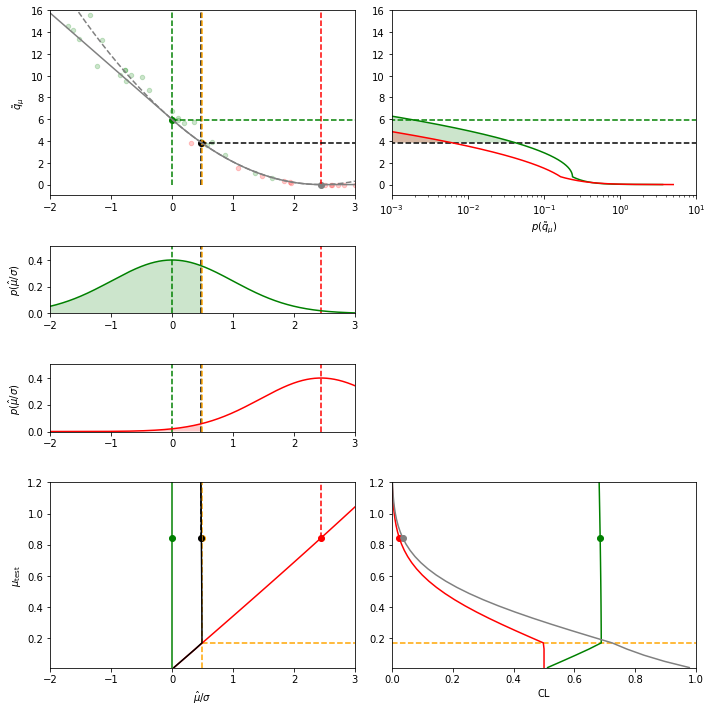

/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/pyhf/tensor/numpy_backend.py:334: RuntimeWarning: invalid value encountered in log
  return n * np.log(lam) - lam - gammaln(n + 1.0)
/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


<Figure size 432x288 with 0 Axes>

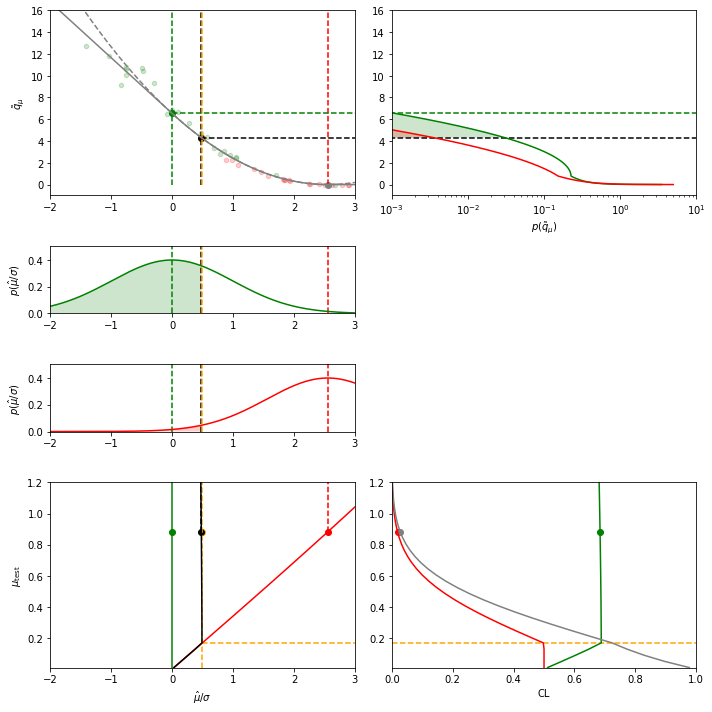

/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/pyhf/tensor/numpy_backend.py:334: RuntimeWarning: invalid value encountered in log
  return n * np.log(lam) - lam - gammaln(n + 1.0)
/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


<Figure size 432x288 with 0 Axes>

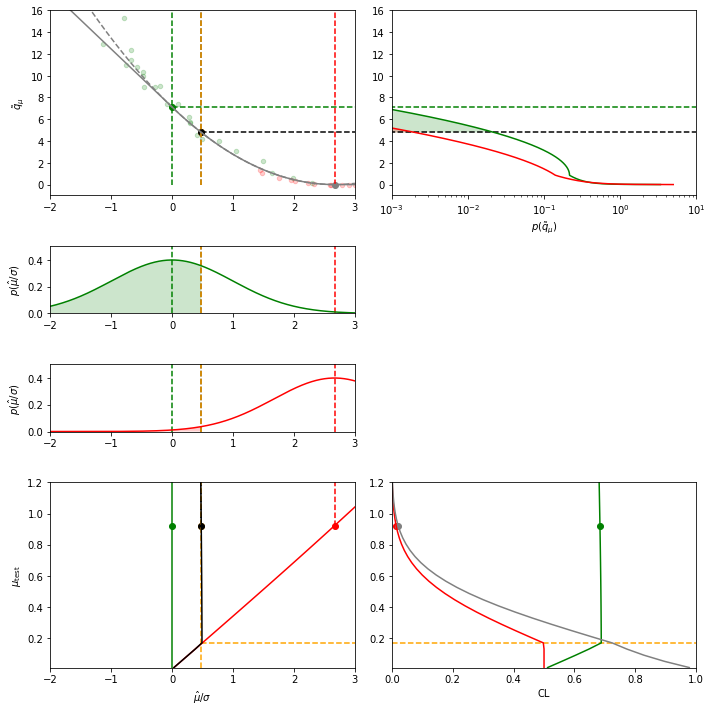

/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/pyhf/tensor/numpy_backend.py:334: RuntimeWarning: invalid value encountered in log
  return n * np.log(lam) - lam - gammaln(n + 1.0)
/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


<Figure size 432x288 with 0 Axes>

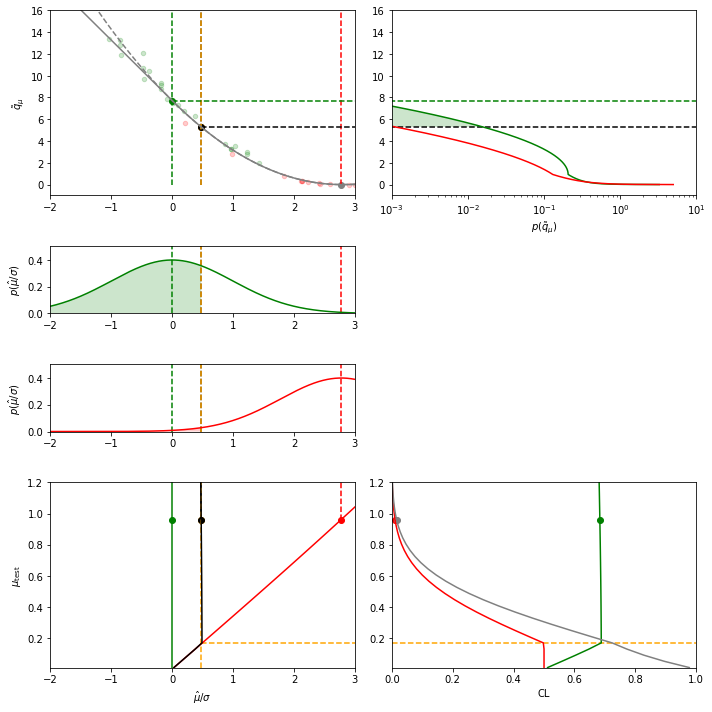

/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/pyhf/tensor/numpy_backend.py:334: RuntimeWarning: invalid value encountered in log
  return n * np.log(lam) - lam - gammaln(n + 1.0)
/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


<Figure size 432x288 with 0 Axes>

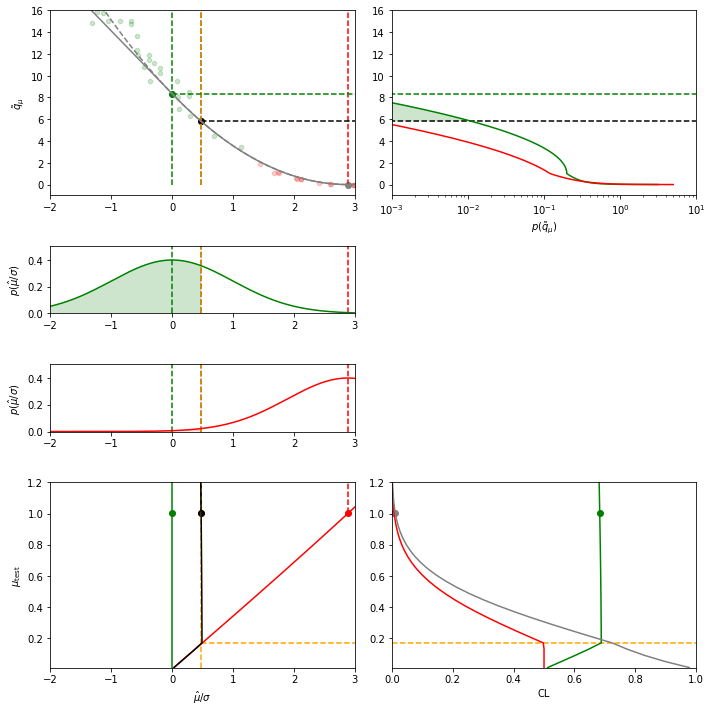

/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/pyhf/tensor/numpy_backend.py:334: RuntimeWarning: invalid value encountered in log
  return n * np.log(lam) - lam - gammaln(n + 1.0)
/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


<Figure size 432x288 with 0 Axes>

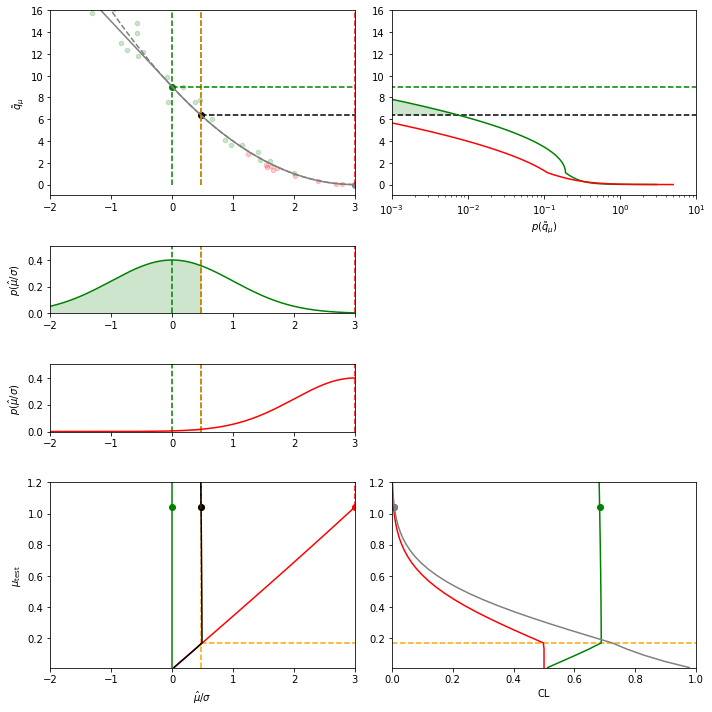

/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/pyhf/tensor/numpy_backend.py:334: RuntimeWarning: invalid value encountered in log
  return n * np.log(lam) - lam - gammaln(n + 1.0)
/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


<Figure size 432x288 with 0 Axes>

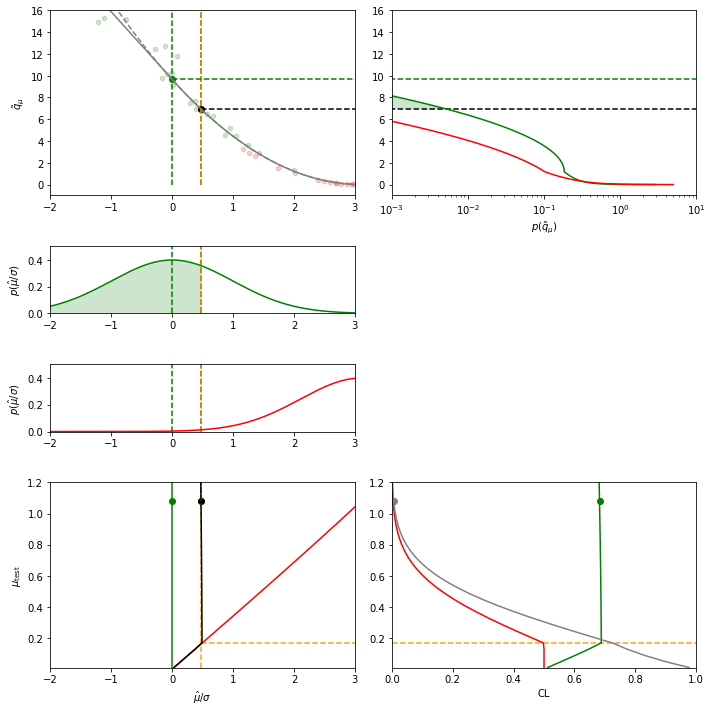

/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/pyhf/tensor/numpy_backend.py:334: RuntimeWarning: invalid value encountered in log
  return n * np.log(lam) - lam - gammaln(n + 1.0)
/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


<Figure size 432x288 with 0 Axes>

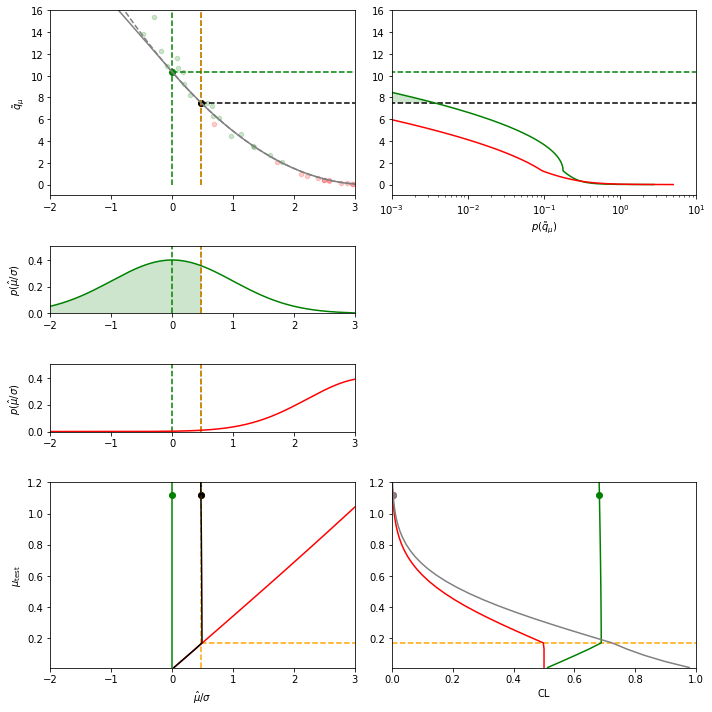

/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/pyhf/tensor/numpy_backend.py:334: RuntimeWarning: invalid value encountered in log
  return n * np.log(lam) - lam - gammaln(n + 1.0)
/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


<Figure size 432x288 with 0 Axes>

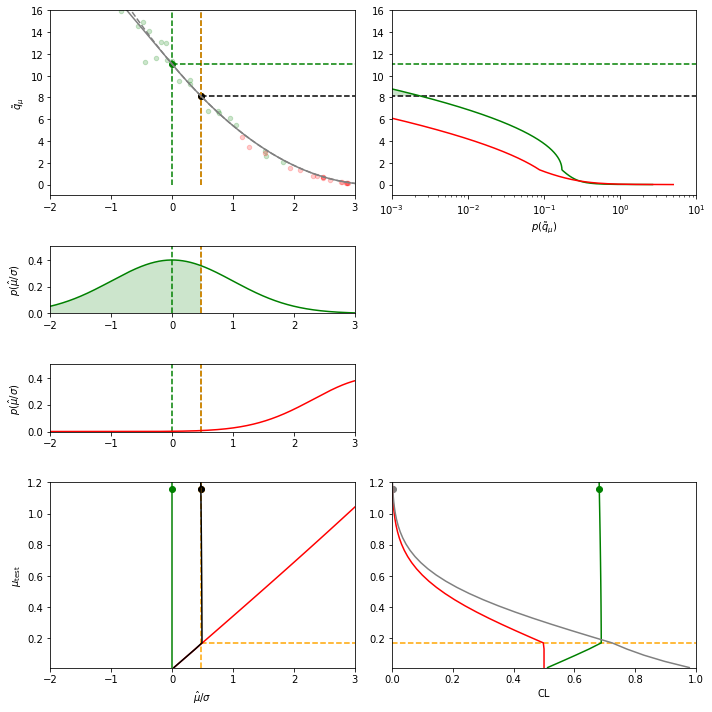

/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/pyhf/tensor/numpy_backend.py:334: RuntimeWarning: invalid value encountered in log
  return n * np.log(lam) - lam - gammaln(n + 1.0)
/Users/lukasheinrich/Code/neos/neosenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


<Figure size 432x288 with 0 Axes>

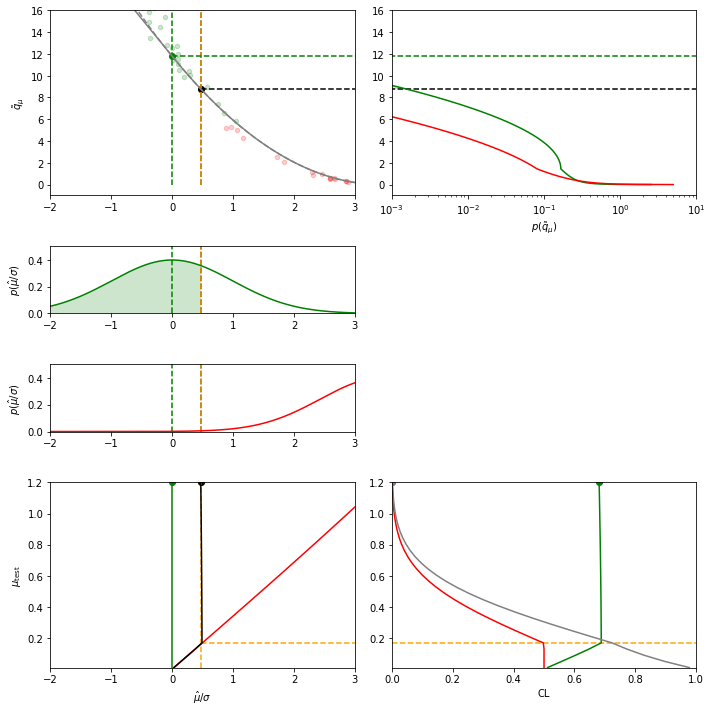

<Figure size 432x288 with 0 Axes>

In [3]:
def plot_explanation(
    axarr,
    index,
    muhatspan,
    muspan,
    test_stats,
    vals,
):


    mutest_at_index = muspan[index]
    means_at_index = -test_stats[index,[1,0]]
    ts_at_index = -test_stats[index,2]


    tail_span = np.linspace(muhatmin, ts_at_index, 1001)



    vals_at_index = vals[index]


    obs_pllr_ts = pyhf.infer.test_statistics.qmu_tilde(
        mutest_at_index,data,model,
        model.config.suggested_init(),model.config.suggested_bounds(),model.config.suggested_fixed()
    )


    ###
    toys_bkg = model.make_pdf(pyhf.tensorlib.astensor([0.0,1.0])).sample((25,))
    toys_sig = model.make_pdf(pyhf.tensorlib.astensor([1.0,1.0])).sample((25,))
    muhat_s,qmu_tilde_s = get_toy_results(mutest_at_index,toys_sig)
    muhat_b,qmu_tilde_b = get_toy_results(mutest_at_index,toys_bkg)


    asimov_pllr_ts = pyhf.infer.test_statistics.qmu_tilde(
        mutest_at_index,asimov_data,model,
        model.config.suggested_init(),model.config.suggested_bounds(),model.config.suggested_fixed()
    )
    sigma = np.sqrt(mutest_at_index**2/asimov_pllr_ts)
    ###


    tsrail_parab = testrail_parab(muhatspan,mutest_at_index/sigma, sigma = 1)
    tsrail_flat = testrail_flat(muhatspan,mutest_at_index/sigma, sigma = 1)




    tail_span_qq = np.linspace(obs_pllr_ts, maxsigma**2, 1001)


    unbounded_bounds = model.config.suggested_bounds()
    unbounded_bounds[model.config.poi_index] = (-10, 10)
    empirial_muhat = pyhf.infer.mle.fit(
        data,model,
        par_bounds = unbounded_bounds
    )[model.config.poi_index] 
    empirial_muhat = empirial_muhat / sigma



    muhat_pdfs = scipy.stats.norm(np.array(means_at_index)).pdf(np.tile(muhatspan.reshape(-1,1),(1,2)))

    muhat_pdfs_tail = scipy.stats.norm(np.array(means_at_index)).pdf(np.tile(tail_span.reshape(-1,1),(1,2)))






    ax = axarr['A']
    ax.set_ylabel(r'$\tilde{q}_\mu$')
    ax.set_xlim(muhatmin,muhatmax)

    ax.plot(muhatspan,tsrail_parab, c = 'grey', linestyle = 'dashed')
    ax.plot(muhatspan,tsrail_flat, c = 'grey')
    ax.vlines(0,0,maxsigma**2,colors = 'green', linestyles = 'dashed')
    ax.vlines(means_at_index[1],0,maxsigma**2,colors = 'red', linestyles = 'dashed')
    ax.vlines(ts_at_index,0,maxsigma**2,colors = 'black', linestyles = 'dashed')
    ax.vlines(empirial_muhat,0,maxsigma**2,colors = 'orange', linestyles = 'dashed')


    ax.scatter(muhat_b/sigma,qmu_tilde_b, alpha = 0.2, c = 'green', s = 20)
    ax.scatter(muhat_s/sigma,qmu_tilde_s, alpha = 0.2, c = 'red', s = 20)
    ax.scatter(0.0,asimov_pllr_ts, c = 'green')

    ax.hlines(asimov_pllr_ts,0.0,muhatmax, colors = 'green', linestyles='dashed')


    ax.hlines(obs_pllr_ts,ts_at_index,muhatmax, colors = 'black', linestyles='dashed')
    ax.scatter(empirial_muhat,obs_pllr_ts,c = 'orange')
    ax.scatter(ts_at_index,obs_pllr_ts,c = 'black')
    ax.scatter(mutest_at_index/sigma,0.0,c = 'grey')

    ax.set_ylim(-1,maxsigma**2)


    ax = axarr['B']
    ax.set_xlabel(r'$p(\tilde{q}_\mu)$')
    pqq_s = gpdf(qqspan,mutest_at_index,1.0,mutest_at_index)
    pqq_b = gpdf(qqspan,0.0,1.0,mutest_at_index)

    pqq_s_tail = gpdf(tail_span_qq,mutest_at_index,1.0,mutest_at_index)
    pqq_b_tail = gpdf(tail_span_qq,0.0,1.0,mutest_at_index)

    ax.plot(pqq_b,qqspan, c = 'green')
    ax.plot(pqq_s,qqspan, c = 'red')

    ax.fill_betweenx(tail_span_qq,pqq_b_tail, facecolor = 'green', alpha = 0.2)
    ax.fill_betweenx(tail_span_qq,pqq_s_tail, facecolor = 'red', alpha = 0.2)
    ax.set_xscale('log')

    ax.hlines(obs_pllr_ts,0.0,10.0, colors = 'black', linestyles='dashed')
    ax.hlines(asimov_pllr_ts,0.0,10.0, colors = 'green', linestyles='dashed')
    ax.set_xlim(1e-3,1e1)
    ax.set_ylim(-1,maxsigma**2)



    ax = axarr['F']

    ax.set_ylabel(r'$p(\hat{\mu}/\sigma)$')

    ax.plot(muhatspan,muhat_pdfs[:,0], c = 'green')
    ax.fill_between(tail_span,muhat_pdfs_tail[:,0], facecolor = 'green', alpha = 0.2)

    ax.vlines(0,0,.5,colors = 'green', linestyles = 'dashed')
    ax.vlines(means_at_index[1],0,.5,colors = 'red', linestyles = 'dashed')
    ax.vlines(ts_at_index,0,.5,colors = 'black', linestyles = 'dashed')
    ax.vlines(empirial_muhat,0,.5,colors = 'orange', linestyles = 'dashed')
    ax.set_xlim(muhatmin,muhatmax)
    ax.set_ylim(0,.5)

    ax = axarr['C']
    ax.set_ylabel(r'$p(\hat{\mu}/\sigma)$')

    ax.plot(muhatspan,muhat_pdfs[:,1], c = 'red')
    ax.fill_between(tail_span,muhat_pdfs_tail[:,1], facecolor = 'red', alpha = 0.2)
    ax.vlines(0,0,.5,colors = 'green', linestyles = 'dashed')
    ax.vlines(means_at_index[1],0,.5,colors = 'red', linestyles = 'dashed')
    ax.vlines(ts_at_index,0,.5,colors = 'black', linestyles = 'dashed')
    ax.vlines(empirial_muhat,0,.5,colors = 'orange', linestyles = 'dashed')
    ax.set_xlim(muhatmin,muhatmax)
    ax.set_ylim(0,.5)

    ax = axarr['D']
    ax.set_ylabel(r'$\mu_\mathrm{test}$')
    ax.set_xlabel(r'$\hat{\mu}/\sigma$')

    ax.scatter(empirial_muhat,mutest_at_index, c = 'orange')
    ax.plot(-test_stats[:,0],muspan, c = 'red')
    ax.plot(-test_stats[:,1],muspan, c = 'green')
    ax.scatter(means_at_index[1],mutest_at_index, c = 'red')
    ax.vlines(means_at_index[1],mutest_at_index,5,colors = 'red', linestyles = 'dashed')

    ax.plot(-test_stats[:,2],muspan, c = 'black')
    ax.scatter(ts_at_index,mutest_at_index, c = 'black')
    ax.vlines(ts_at_index,mutest_at_index,mumax,colors = 'black', linestyles = 'dashed')
    ax.vlines(empirial_muhat,mumin,mumax,colors = 'orange', linestyles = 'dashed')
    ax.hlines(empirial_muhat*sigma,empirial_muhat,muhatmax,colors = 'orange', linestyles = 'dashed')

    ax.scatter(means_at_index[0],mutest_at_index, c = 'green')

    ax.set_xlim(muhatmin,muhatmax)
    ax.set_ylim(mumin, mumax)

    ax = axarr['E']
    ax.set_xlabel(r'CL')

    ax.plot(vals[:,0],muspan,c = 'red')
    ax.plot(vals[:,1],muspan,c = 'green')
    ax.plot(vals[:,2],muspan,c = 'grey')


    ax.scatter(vals_at_index[0],mutest_at_index, c = 'red')
    ax.scatter(vals_at_index[1],mutest_at_index, c = 'green')
    ax.scatter(vals_at_index[2],mutest_at_index, c = 'grey')

    ax.hlines(empirial_muhat*sigma,0,1.0,colors = 'orange', linestyles = 'dashed')

    ax.set_ylim(mumin,mumax)
    ax.set_xlim(0,1)



for index in range(len(muspan)):
# for index in [15]:
    f,axarr = plt.subplot_mosaic("""
    AAABBB
    AAABBB
    FFF...
    CCC...
    DDDEEE
    DDDEEE
    """)

    plot_explanation(
        axarr,
        index,
        muhatspan,
        muspan,
        test_stats,
        vals,
    )

    f.set_tight_layout(True)
    f.set_size_inches(10,10)
    f.savefig(f'scan{str(index).zfill(5)}.png')
    plt.show()
    plt.clf()
